In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import cv2
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [2]:
input_arr = np.random.randint(0, high=3, size=(8, 8), dtype=np.uint8)

In [3]:
input_arr

array([[2, 0, 1, 2, 2, 1, 1, 0],
       [2, 0, 2, 2, 0, 2, 2, 0],
       [2, 2, 0, 0, 0, 2, 0, 0],
       [2, 1, 2, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 2, 2, 0],
       [0, 1, 2, 2, 0, 2, 1, 2],
       [1, 2, 1, 2, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 2]], dtype=uint8)

In [4]:
input_arr = cv2.cvtColor(input_arr, cv2.COLOR_GRAY2RGB)
for i in range(input_arr.shape[0]):
    for j in range(input_arr.shape[1]):
        if input_arr[i, j][0] == 0:
            input_arr[i, j] = [255, 0, 0]
        elif input_arr[i, j][0] == 1:
            input_arr[i, j] = [0, 255, 0]
        elif input_arr[i, j][0] == 2:
            input_arr[i, j] = [0, 0, 255]
input_arr = cv2.resize(input_arr, (640, 480), interpolation=cv2.INTER_CUBIC)

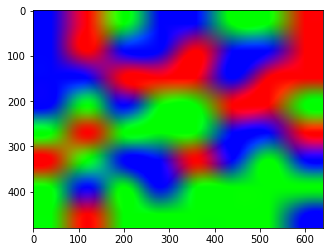

In [5]:
plt.imshow(input_arr)

In [97]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 15)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
#cap.set(cv2.CAP_PROP_BUFFERSIZE, 10)

while True:
    _, frame = cap.read()

    overlay = cv2.addWeighted(frame, 1, input_arr, 0.5, 3)

    cv2.imshow('frame', overlay)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [11]:
#In case cv fails to close video feed and windows
cap.release()
cv2.destroyAllWindows()